In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse
import rtmtools.lblrtm.visualisation as viz

import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.clirad.sw.analyse as cliradanalyse
import rtmtools.clirad.sw.info

import rtmtools.rrtmg.sw.wrangle as rrtmgwrangle
import rtmtools.rrtmg.sw.analyse as rrtmganalyse



importlib.reload(aerutils)
importlib.reload(aeranalyse)
importlib.reload(viz)

importlib.reload(cliradwrangle)
importlib.reload(cliradanalyse)
importlib.reload(rtmtools.clirad.sw.info)

importlib.reload(rrtmgwrangle)
importlib.reload(rrtmganalyse)


<module 'rtmtools.rrtmg.sw.analyse' from '/nuwa_cluster/home/jackyu/radiation/rtmtools/rtmtools/rrtmg/sw/analyse.py'>

# Shortwave. Mid-latitude summer. $H_{2}O$. Solar zenith = $60^{\circ}$

In [2]:
name_molecule = r'$H_{2}O$'

In [3]:
# Load CRD results

# CRD H2008
pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/SW/examples/mls75_H2O/OUTPUT_CRD.dat'
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)


In [4]:
# CRD H2012
pathout_crd = '../crd/SW/examples/mls75_H2O_solzen_60_H2012/OUTPUT_CRD.dat'
pnl_crd_H2012 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)

## In selected spectral bands

In [5]:
# By arbitrary bands

def define_spectral_bands():
    return [(1000, 4400),
           (4400, 8200),
           (8200, 14280),
           (14280, 25000),
           (1000, 25000)]


def fluxtableNhrplot_by_bands(bands, *infos_lbl):
    global name_molecule, xlim_linear
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
          
    pnls = [aeranalyse.lines2bands(pnl_lbl, wbands = bands)\
            for pnl_lbl in pnls_lbl]
    
    
    for item in bands:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in pnls]
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'Wavenumber band: {} ~ {} cm-1'.format(*item))      
        
        dfs = [pnl[item] for pnl in pnls]
        
        max_cr = max([df['heating_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Heating rate {} {} ~ {} cm-1'.format(name_molecule, *item),
                              cooling_rate = False,
                              xlim_linear = None,
                              xlim_log = None)
    
        display.display(plt.gcf()); plt.close()

Flux tables and heating rates in various spectral bands


---------------------------------------------------------------------------


Wavenumber band: 1000 ~ 4400 cm-1

CRD H2008
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  29.352153  29.352153      0.351053
30   299.800000        0  25.503405  25.503405      0.355012
0   1013.000000        0  10.547747  10.547747      0.100244

CRD H2012
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  29.352152  29.352152      0.352367
30   299.800000        0  25.499421  25.499421      0.355324
0   1013.000000        0  10.532794  10.532794      0.100384

CRD H2008 - CRD H2012
    pressure  flux_up  flux_down  net_flux  heating_rate
70         0        0   0.000002  0.000002     -0.001315
30         0        0   0.003984  0.003984     -0.000312
0          0        0   0.014953  0.014953     -0.000139



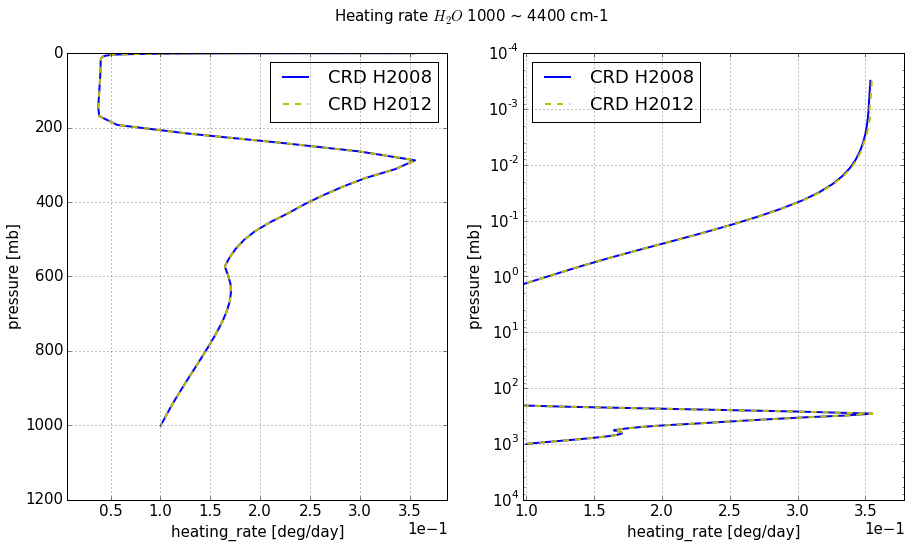

---------------------------------------------------------------------------


Wavenumber band: 4400 ~ 8200 cm-1

CRD H2008
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  113.874482  113.874482      0.104813
30   299.800000        0  109.312006  109.312006      0.514142
0   1013.000000        0   65.972910   65.972910      0.315031

CRD H2012
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  113.874481  113.874481      0.103635
30   299.800000        0  109.308523  109.308523      0.514424
0   1013.000000        0   65.936687   65.936687      0.317339

CRD H2008 - CRD H2012
    pressure  flux_up     flux_down      net_flux  heating_rate
70         0        0  4.390007e-07  4.390007e-07      0.001178
30         0        0  3.483420e-03  3.483420e-03     -0.000282
0          0        0  3.622293e-02  3.622293e-02     -0.002308



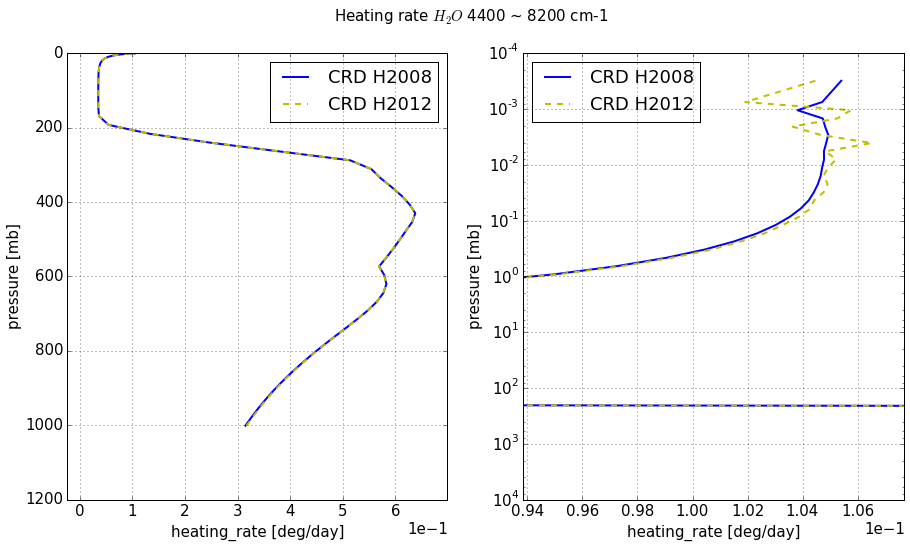

---------------------------------------------------------------------------


Wavenumber band: 8200 ~ 14280 cm-1

CRD H2008
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  220.865503  220.865503      0.005160
30   299.800000        0  220.015104  220.015104      0.119130
0   1013.000000        0  176.023173  176.023173      0.735974

CRD H2012
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  220.865516  220.865516      0.005619
30   299.800000        0  219.955098  219.955098      0.125926
0   1013.000000        0  175.592757  175.592757      0.728109

CRD H2008 - CRD H2012
    pressure  flux_up  flux_down  net_flux  heating_rate
70         0        0  -0.000013 -0.000013     -0.000459
30         0        0   0.060006  0.060006     -0.006796
0          0        0   0.430416  0.430416      0.007866



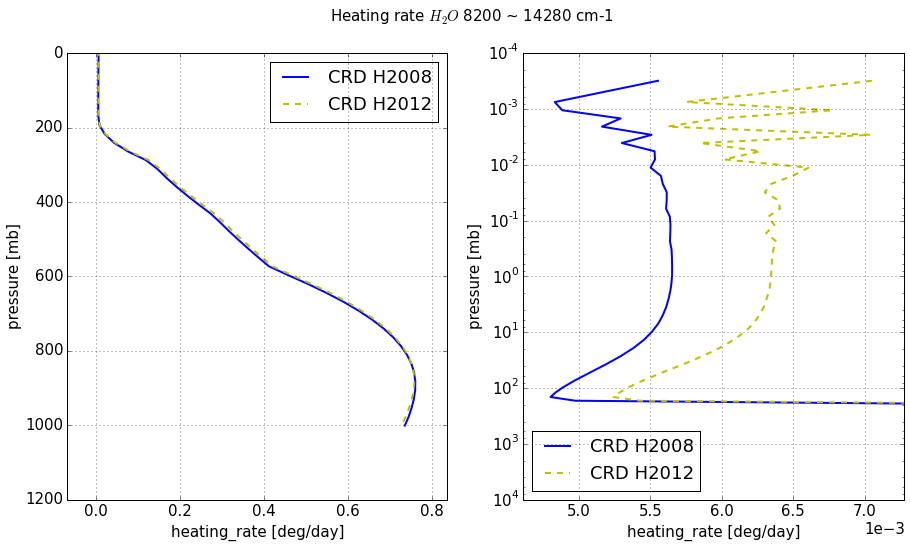

---------------------------------------------------------------------------


Wavenumber band: 14280 ~ 25000 cm-1

CRD H2008
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  265.238499  265.238499      0.000006
30   299.800000        0  265.230235  265.230235      0.001316
0   1013.000000        0  262.841654  262.841654      0.070991

CRD H2012
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  265.238503  265.238503      0.000000
30   299.800000        0  265.230089  265.230089      0.001341
0   1013.000000        0  262.775982  262.775982      0.073132

CRD H2008 - CRD H2012
    pressure  flux_up  flux_down  net_flux  heating_rate
70         0        0  -0.000004 -0.000004      0.000006
30         0        0   0.000146  0.000146     -0.000025
0          0        0   0.065672  0.065672     -0.002141



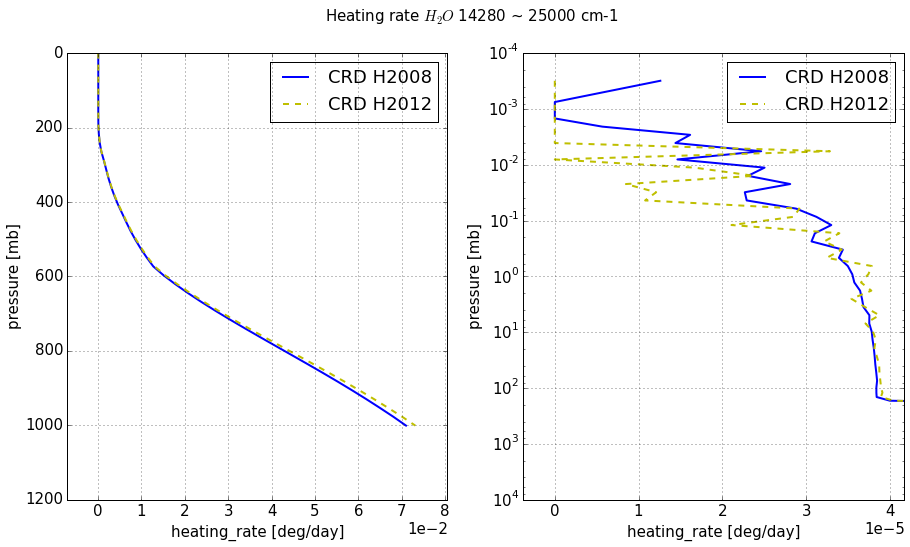

---------------------------------------------------------------------------


Wavenumber band: 1000 ~ 25000 cm-1

CRD H2008
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  629.330637  629.330637      0.461031
30   299.800000        0  620.060750  620.060750      0.989600
0   1013.000000        0  515.385483  515.385483      1.222241

CRD H2012
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  629.330652  629.330652      0.461621
30   299.800000        0  619.993131  619.993131      0.997016
0   1013.000000        0  514.838220  514.838220      1.218964

CRD H2008 - CRD H2012
    pressure  flux_up  flux_down  net_flux  heating_rate
70         0        0  -0.000015 -0.000015     -0.000590
30         0        0   0.067619  0.067619     -0.007416
0          0        0   0.547264  0.547264      0.003277



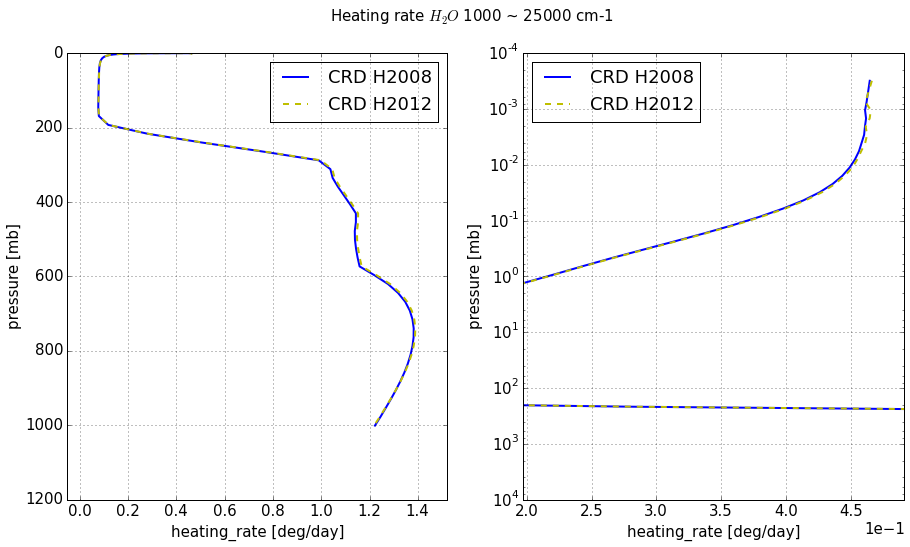

In [6]:
print('Flux tables and heating rates in various spectral bands')
print()
print()

fluxtableNhrplot_by_bands(define_spectral_bands(), \
                         ('CRD H2008', 'b', '-', pnl_crd),
                         ('CRD H2012', 'y', '--', pnl_crd_H2012))

In [7]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')